In [1]:
%cd ..

/mnt/cup/labs/hasson/zaid/fmri-convs


In [7]:
from glob import glob

import nibabel as nib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from util.path import Path
from constants import CONVS_STRANGERS

# Utterance transcripts

verify that we have all transcripts ready to process

In [66]:
transpath = Path(root='stimuli', datatype='transcript', suffix='utterance', ext='.csv')
files = glob(transpath.starstr(['conv', 'datatype']))
len(files)

555

In [67]:
dfs = []
for filename in files:
    df = pd.read_csv(filename)
    filepath = Path.frompath(filename)
    df.insert(0, 'trial', filepath['trial'])
    df.insert(0, 'run', filepath['run'])
    df.insert(0, 'conv', filepath['conv'])
    dfs.append(df)
df = pd.concat(dfs)
df.sort_values(['conv', 'run', 'trial', 'onset'], inplace=True)
df.reset_index(drop=True, inplace=True)

print(len(df))
df.head()

4114


,conv,run,trial,speaker,onset,text
0,101,1,1,Speaker 2,4,"Hi. Um, so given the choice of anyone in the w..."
1,101,1,1,Speaker 1,59,I guess I'm not going to live up to his conver...
2,101,1,1,Speaker 2,119,"Um, so, sorry about that, first of all, and so..."
3,101,1,3,Speaker 1,2,"Uh, so when I'm gonna make a telephone call, I..."
4,101,1,3,Speaker 2,38,"That makes sense. Um, for me, because I'm kind..."


In [5]:
# what conversations are missing?
set(CONVS_STRANGERS) - set(df.conv.unique().tolist())

{119}

* conv-108 
* conv-111
* conv-116
* conv-117
* conv-119 conv-scan_db missing sub 109
* conv-122
* conv-129
* conv-138
* conv-143

don't really know why these are missing. all bu 119 have usuable scans, some have incomplete field maps

In [68]:
# which conversations are missing transcripts?
dfc = df[['conv', 'run', 'trial']].drop_duplicates().reset_index(drop=True)
dft = dfc.groupby('conv').trial.count()
dft[dft.values != 10]

conv
143    11
168     6
171     8
Name: trial, dtype: int64

In [69]:
df[df.conv == 143]

,conv,run,trial,speaker,onset,text
1746,143,1,2,Speaker 1,3,I think I'd want to be famous in a more academ...
1747,143,1,2,Speaker 2,55,"Um, yeah, I agree, honestly. I feel like, uh, ..."
1748,143,1,2,Speaker 1,81,"Definitely. Like, I think research is such a h..."
1749,143,1,2,Speaker 2,143,"Yeah, I think it would be, like, really cumber..."
1750,143,1,2,Speaker 1,173,"Yeah, I definitely agree. It's, like, a differ..."
1751,143,1,4,Speaker 1,1,I think a perfect day for me would be waking u...
1752,143,1,4,Speaker 2,73,"Yeah. I feel like for me, it would be somewhat..."
1753,143,1,4,Speaker 1,131,"Yeah, I think that's like the key thing, like ..."
1754,143,1,4,Speaker 2,161,Yeah. I feel like it's hard to like have the p...
1755,143,2,5,Speaker 1,2,"That's really hard, um, but I'd say the mind o..."


- **168: moved a lot and stopped early, only 3 valid runs**
- **171: stopped early. only 3 valid runs**
- 143: had to take out in the middle of the scan and put back in - only have 1 set of field maps (I - Incomplete)

# Word-level transcripts

check out the processed transcripts

In [7]:
transpath = Path(root='stimuli', datatype='transcript', suffix='word', ext='.csv')
files = glob(transpath.starstr(['conv', 'datatype']))
len(files)

309

In [8]:
dfs = []
for filename in files:
    df = pd.read_csv(filename)
    filepath = Path.frompath(filename)
    df.insert(0, 'trial', filepath['trial'])
    df.insert(0, 'run', filepath['run'])
    df.insert(0, 'conv', filepath['conv'])
    dfs.append(df)
df = pd.concat(dfs)
df.sort_values(['conv', 'run', 'trial', 'onset'], inplace=True)
df.reset_index(drop=True, inplace=True)

print(len(df))
df.head()

185312


,conv,run,trial,turn,utterance,speaker,onset,offset,sentence_id,is_punct,token,token_norm
0,101,1,1,0,0,1,4,59.0,0.0,False,Hi,hi
1,101,1,1,0,0,1,4,59.0,0.0,True,.,NaN
2,101,1,1,0,0,1,4,59.0,1.0,False,Um,um
3,101,1,1,0,0,1,4,59.0,1.0,True,",",NaN
4,101,1,1,0,0,1,4,59.0,1.0,False,so,so


In [9]:
# what conversations are missing?
set(CONVS_STRANGERS) - set(df.conv.unique().tolist())

{119}

In [10]:
# Which trials are missing?
dfc = df[['conv', 'run', 'trial']].drop_duplicates().reset_index(drop=True)
dft = dfc.groupby('conv').trial.count()
dft[dft.values != 10]

conv
143    11
171     8
Name: trial, dtype: int64

## Aligned transcripts
first, check that MFA created TextGrids

In [36]:
transpath = Path(root='stimuli', datatype='aligned', ext='.TextGrid')
files = glob(transpath.starstr(['conv', 'datatype']))
len(files)

309

In [37]:
records = []
for file in files:
    path = Path.frompath(file)
    records.append([path['conv'], path['run'], path['trial']])
df = pd.DataFrame(records, columns=['conv', 'run', 'trial'])
df.sort_values(['conv', 'run', 'trial'], inplace=True)
df.reset_index(drop=True, inplace=True)
df

,conv,run,trial
0,101,1,1
1,101,1,3
2,101,2,6
3,101,2,8
4,101,3,10
...,...,...,...
304,174,3,12
305,174,4,13
306,174,4,15
307,174,5,18


In [38]:
# what conversations are missing?
set(CONVS_STRANGERS) - set(df.conv.unique().tolist())

{119}

In [39]:
# Which trials are missing?
dft = df.groupby('conv').trial.count()
dft[dft.values != 10]

conv
143    11
171     8
Name: trial, dtype: int64

# Merged transcripts

In [51]:
transpath = Path(root='stimuli', datatype='aligned', ext='.csv')
files = glob(transpath.starstr(['conv', 'datatype']))
len(files)

332

In [54]:
dfs = []
for filename in files:
    if 'analysis' in filename:
        continue
    df = pd.read_csv(filename, index_col=0)
    filepath = Path.frompath(filename)
    df.insert(0, 'conv', filepath['conv'])
    dfs.append(df)
df = pd.concat(dfs)
df.sort_values(['conv', 'run', 'trial', 'onset'], inplace=True)
df.reset_index(drop=True, inplace=True)

print(len(df))
df.head()

147285


,conv,run,trial,turn,utterance,speaker,sentence_id,token,token_norm,onset,offset
0,101,1,1,0,0,1,0.0,Hi,hi,4.00,4.34
1,101,1,1,0,0,1,1.0,Um,um,4.34,4.59
2,101,1,1,0,0,1,1.0,so,so,4.72,5.18
3,101,1,1,0,0,1,1.0,given,given,5.36,5.69
4,101,1,1,0,0,1,1.0,the,the,5.69,7.92


In [56]:
# what conversations are missing?
set(CONVS_STRANGERS) - set(df.conv.unique().tolist())

{119, 171}

In [57]:
# Which trials are missing?
dfc = df[['conv', 'run', 'trial']].drop_duplicates().reset_index(drop=True)
dft = dfc.groupby('conv').trial.count()
dft[dft.values != 10]

conv
143    11
Name: trial, dtype: int64

In [61]:
dft

conv
101    10
104    10
105    10
106    10
107    10
108    10
111    10
112    10
114    10
116    10
117    10
120    10
122    10
123    10
126    10
128    10
129    10
131    10
132    10
133    10
137    10
138    10
142    10
143    11
153    10
156    10
157    10
158    10
163    10
174    10
Name: trial, dtype: int64

In [62]:
# Number of words per trial
df.groupby(['conv', 'run', 'trial']).token.count().describe()

count    301.000000
mean     489.318937
std       59.304451
min      123.000000
25%      458.000000
50%      492.000000
75%      525.000000
max      665.000000
Name: token, dtype: float64

In [7]:
# Number of words per trial per speaker (how short turns are between speakers)
df.groupby(['conv', 'run', 'trial', 'speaker']).token.count().describe()

count    382.000000
mean     244.298429
std       62.107222
min       58.000000
25%      205.000000
50%      244.500000
75%      280.000000
max      469.000000
Name: token, dtype: float64

In [64]:
# Number of words per conversations
df.conv.value_counts(sort=False)

conv
101    4958
104    4848
105    5021
106    4734
107    5456
108    5181
111    4702
112    5036
114    5235
116    4204
117    5847
120    4907
122    4760
123    4457
126    5865
128    4477
129    5087
131    4570
132    4287
133    3985
137    5157
138    5565
142    4868
143    4501
153    5092
156    5121
157    5002
158    4591
163    4786
174    4985
Name: count, dtype: int64

In [63]:
# Runs per conversation
# Should be 5 runs per conversation
df[['conv', 'run']].drop_duplicates().reset_index(drop=True).groupby('conv').run.count()

conv
101    5
104    5
105    5
106    5
107    5
108    5
111    5
112    5
114    5
116    5
117    5
120    5
122    5
123    5
126    5
128    5
129    5
131    5
132    5
133    5
137    5
138    5
142    5
143    5
153    5
156    5
157    5
158    5
163    5
174    5
Name: run, dtype: int64

# Brain confounds

In [31]:
CONFOUNDS = set(['a_comp_cor_00', 'a_comp_cor_01', 'a_comp_cor_02', 'a_comp_cor_03',
'a_comp_cor_04','trans_x', 'trans_y', 'trans_z', 'rot_x', 'rot_y', 'rot_z',
'cosine00'])

In [19]:
path = Path(root='data/derivatives/fmriprep', datatype='func', sub='*', ses='1', desc='confounds', suffix='timeseries', ext='.tsv')
path

data/derivatives/fmriprep/sub-*/ses-1/func/sub-*_ses-1_desc-confounds_timeseries.tsv

In [22]:
files = glob(path.starstr(['sub', 'ses', 'datatype']))
len(files)

739

In [33]:
badfiles = []
for filepath in files:
    df = pd.read_csv(filepath, sep='\t', nrows=0)
    if len(CONFOUNDS.intersection(set(df.columns.tolist()))) < len(CONFOUNDS):
        print(filepath)
        badfiles.append(filepath)
print(len(badfiles))

data/derivatives/fmriprep/sub-101/ses-1/func/sub-101_ses-1_task-Conv_run-1_desc-confounds_timeseries.tsv
1


In [34]:
df = pd.read_csv('data/derivatives/fmriprep/sub-101/ses-1/func/sub-101_ses-1_task-Conv_run-1_desc-confounds_timeseries.tsv', sep='\t')
df

,global_signal,global_signal_derivative1,global_signal_power2,global_signal_derivative1_power2,csf,csf_derivative1,csf_power2,csf_derivative1_power2,white_matter,white_matter_derivative1,...,motion_outlier17,motion_outlier18,motion_outlier19,motion_outlier20,motion_outlier21,motion_outlier22,motion_outlier23,motion_outlier24,motion_outlier25,motion_outlier26
0,618.441162,NaN,382469.471237,NaN,426.450592,NaN,181860.107275,NaN,520.307416,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,617.029841,-1.411321,380725.824613,1.991828,422.433100,-4.017492,178449.723778,16.140243,519.439973,-0.867443,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,616.414654,-0.615187,379967.025821,0.378455,422.615533,0.182433,178603.888907,0.033282,519.557217,0.117244,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,614.814679,-1.599975,377997.089620,2.559920,421.459828,-1.155705,177628.386916,1.335654,518.813584,-0.743632,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,615.233214,0.418535,378511.907310,0.175171,419.217436,-2.242393,175743.258343,5.028325,518.718417,-0.095167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,607.126079,1.027816,368602.075615,1.056407,418.517448,-0.579977,175156.854325,0.336373,516.491259,-0.837065,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
62,609.078719,1.952640,370976.885342,3.812802,420.560703,2.043255,176871.304556,4.174889,517.687123,1.195864,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
63,608.902201,-0.176517,370761.890736,0.031158,413.767731,-6.792971,171203.735356,46.144461,517.119241,-0.567882,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
64,607.437951,-1.464250,368980.864067,2.144030,412.636644,-1.131087,170268.999840,1.279359,517.380701,0.261460,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
[c for c in df.columns.tolist() if 'cosine' in c]

[]

In [58]:
!ls -lhtr data/sub-101/ses-1/func/*task-Conv*gz

-r--r--r--. 1 ltsoi g_tamir  16M Sep 11  2022 data/sub-101/ses-1/func/sub-101_ses-1_task-Conv_run-01_bold.nii.gz
-r--r--r--. 1 ltsoi g_tamir 128M Sep 11  2022 data/sub-101/ses-1/func/sub-101_ses-1_task-Conv_run-02_bold.nii.gz
-r--r--r--. 1 ltsoi g_tamir 127M Sep 11  2022 data/sub-101/ses-1/func/sub-101_ses-1_task-Conv_run-03_bold.nii.gz
-r--r--r--. 1 ltsoi g_tamir 127M Sep 11  2022 data/sub-101/ses-1/func/sub-101_ses-1_task-Conv_run-04_bold.nii.gz
-r--r--r--. 1 ltsoi g_tamir 127M Sep 11  2022 data/sub-101/ses-1/func/sub-101_ses-1_task-Conv_run-05_bold.nii.gz


In [96]:
sub = 109
for run in range(1, 6):
    img = nib.load(f'data/sub-{sub:03d}/ses-1/func/sub-{sub:03d}_ses-1_task-Conv_run-{run:02d}_bold.nii.gz')
    print(sub, run, img.shape)
    del img

109 1 (74, 74, 46, 544)
109 2 (74, 74, 46, 544)
109 3 (74, 74, 46, 544)
109 4 (74, 74, 46, 544)
109 5 (74, 74, 46, 544)


In [52]:
!ls -lhtr data/derivatives/fmriprep/sub-101/ses-1/func/sub-101_ses-1_task-Conv_run-*_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz

-rw-rw-r--. 1 ltsoi games 216M May 16  2022 data/derivatives/fmriprep/sub-101/ses-1/func/sub-101_ses-1_task-Conv_run-5_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz
-rw-rw-r--. 1 ltsoi games 215M May 16  2022 data/derivatives/fmriprep/sub-101/ses-1/func/sub-101_ses-1_task-Conv_run-4_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz
-rw-rw-r--. 1 ltsoi games 215M May 16  2022 data/derivatives/fmriprep/sub-101/ses-1/func/sub-101_ses-1_task-Conv_run-3_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz
-rw-rw-r--. 1 ltsoi games 216M May 16  2022 data/derivatives/fmriprep/sub-101/ses-1/func/sub-101_ses-1_task-Conv_run-2_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz
-rw-rw-r--. 1 ltsoi games  26M May 16  2022 data/derivatives/fmriprep/sub-101/ses-1/func/sub-101_ses-1_task-Conv_run-1_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz


# Atlases

In [30]:
from nilearn import datasets, image

In [24]:
from neuromaps.datasets import fetch_mni152

In [61]:
# this is original data
nib.load('data/sub-104/ses-1/func/sub-104_ses-1_task-Conv_run-03_bold.nii.gz').shape

(74, 74, 46, 544)

In [62]:
# this is bold mask from this space
our_bm = nib.load('data/derivatives/fmriprep/sub-104/ses-1/func/sub-104_ses-1_task-Conv_run-3_space-MNI152NLin2009cAsym_desc-brain_mask.nii.gz')
our_bm.shape

(65, 77, 65)

In [63]:
# this is bold data from this space
our_bold = nib.load('data/derivatives/fmriprep/sub-104/ses-1/func/sub-104_ses-1_task-Conv_run-3_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz')
our_bold.shape

(65, 77, 65, 544)

In [64]:
mni_atlases = fetch_mni152(density='3mm')
mni_atlas = nib.load(mni_atlases['2009cAsym_brainmask'])
mni_atlas.shape

(65, 77, 65)

In [54]:
print(np.unique(our_bm.get_fdata(), return_counts=True))  # (array([0., 1.]), array([246755,  78570]))
print(np.unique(mni_atlas.get_fdata(), return_counts=True))

(array([0., 1.]), array([242071,  83254]))
(array([0.        , 1.00000006]), array([255445,  69880]))


In [ ]:
img = nib.Nifti1Image(data, np.eye(4))

In [52]:
our_bm.affine

array([[   3. ,    0. ,    0. ,  -96.5],
       [   0. ,    3. ,    0. , -132.5],
       [   0. ,    0. ,    3. ,  -78.5],
       [   0. ,    0. ,    0. ,    1. ]])

In [51]:
mni_atlas.affine

array([[   3.,    0.,    0.,  -96.],
       [   0.,    3.,    0., -132.],
       [   0.,    0.,    3.,  -78.],
       [   0.,    0.,    0.,    1.]])

In [58]:
our_bold.affine

array([[   3. ,    0. ,    0. ,  -96.5],
       [   0. ,    3. ,    0. , -132.5],
       [   0. ,    0. ,    3. ,  -78.5],
       [   0. ,    0. ,    0. ,    1. ]])

In [118]:
atlas = datasets.fetch_atlas_schaefer_2018(n_rois=100, yeo_networks=7, resolution_mm=1)
atlasimg = nib.load(atlas['maps'])
atlasimg.shape

(182, 218, 182)

In [119]:
records = []
for item in atlas['labels']:
    records.append(item.decode().split('_')[1:])
df = pd.DataFrame(records, columns=['hemi', 'network', 'area', 'n'])

In [122]:
df.network.value_counts()

network
Default        24
Vis            17
DorsAttn       15
SomMot         14
Cont           13
SalVentAttn    12
Limbic          5
Name: count, dtype: int64

In [120]:
df.groupby(['network', 'area']).count()

hemi   n
network     area                
Cont        Cing           2   2
            PFCl           5   5
            PFCmp          1   1
            Par            3   3
            pCun           2   2
Default     PFC            7   7
            PFCdPFCm       3   3
            PFCv           2   2
            Par            3   3
            Temp           5   5
            pCunPCC        4   4
DorsAttn    FEF            2   2
            Post          11  11
            PrCv           2   2
Limbic      OFC            2   2
            TempPole       3   3
SalVentAttn FrOperIns      3   3
            Med            5   5
            PFCl           1   1
            ParOper        1   1
            TempOccPar     2   2
SomMot      1              2   0
            2              2   0
            3              2   0
            4              2   0
            5              2   0
            6              2   0
            7              1   0
            8              1   0
Vis         1              2   0
            2              2   0
            3              2   0
            4              2   0
            5              2   0
            6              2   0
            7              2   0
            8              2   0
            9              1   0

In [96]:
new_schaefer = image.resample_img(atlas['maps'],
                                  clip=False,
                                  interpolation='nearest',
                                  target_affine=mni_atlas.affine,
                                  target_shape=mni_atlas.shape)
new_schaefer.shape

(65, 77, 65)

In [ ]:
nib.save(new_schaefer, 'newschaefer.nii.gz')

In [86]:
atlas = nib.load('allParcels_language_SN220.nii')
labels = pd.read_csv('allParcels_language_SN220.txt', header=None).iloc[:, 0].tolist()
atlas.shape, labels

((91, 109, 91),
 ['LH_IFGorb',
  'LH_IFG',
  'LH_MFG',
  'LH_AntTemp',
  'LH_PostTemp',
  'RH_IFGorb',
  'RH_IFG',
  'RH_MFG',
  'RH_AntTemp',
  'RH_PostTemp'])

In [88]:
new_evlab = image.resample_img('allParcels_language_SN220.nii',
                               clip=False,
                               interpolation='nearest',
                               target_affine=mni_atlas.affine,
                               target_shape=mni_atlas.shape)
new_evlab.shape

(65, 77, 65)

In [3]:
sub, run = 104, 1
img = nib.load(f'data/sub-{sub:03d}/ses-1/func/sub-{sub:03d}_ses-1_task-Conv_run-{run:02d}_bold.nii.gz')
img.shape

(74, 74, 46, 544)

our data shape is 74, 74, 46 which is from 2.5 × 2.5 × 2.75 mm voxels

- https://andysbrainbook.readthedocs.io/en/latest/FrequentlyAskedQuestions/FrequentlyAskedQuestions.html

```
module load afni

# resample the 1 mm atlas to 3 mm 
3dresample -input Schaefer2018_1000Parcels_Kong2022_17Networks_order_FSLMNI152_1mm.nii.gz \
            -prefix Schaefer2018_1000Parcels_Kong2022_17Networks_order_FSLMNI152_3mm.nii.gz \
            -dxyz 2.5 2.5 2.75 -rmode NN

```

# HRF

In [2]:
from nilearn.glm.first_level import glover_hrf
from constants import TR

In [28]:
?glover_hrf

Signature: glover_hrf(tr, oversampling=50, time_length=32.0, onset=0.0)
Docstring:
Implement the Glover hrf model.

Parameters
----------
tr : float
    Scan repeat time, in seconds.

oversampling : int, optional
    Temporal oversampling factor. Default=50.

time_length : float, optional
    hrf kernel length, in seconds. Default=32.

onset : float, optional
    Onset of the response. Default=0.

Returns
-------
hrf : array of shape(length / tr * oversampling, dtype=float)
     hrf sampling on the oversampled time grid.
File:      /scratch/zzada/cache/conda/envs/fb2b/lib/python3.10/site-packages/nilearn/glm/first_level/hemodynamic_models.py
Type:      function

In [33]:
hrf = glover_hrf(TR, oversampling=1, time_length=20)
hrf.shape

(13,)

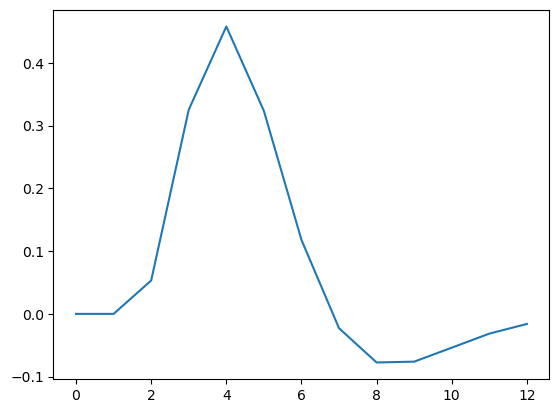

In [34]:
plt.plot(hrf)

In [45]:
impulse = np.zeros(120)
impulse[[20,60,100]] = 1
impulse_hrf = np.convolve(impulse, hrf)[:len(impulse)]

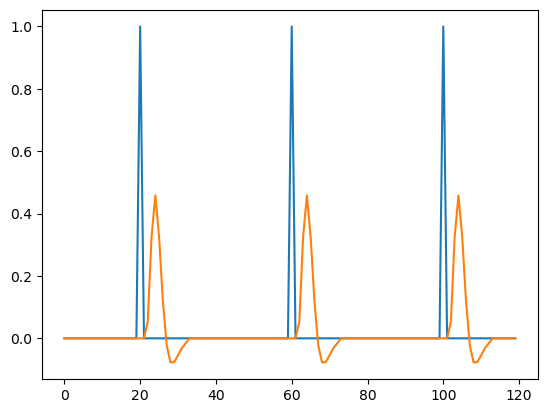

In [46]:
plt.plot(impulse)
plt.plot(impulse_hrf)

# Delayer

In [47]:
from voxelwise_tutorials.delayer import Delayer

In [66]:
delayer = Delayer(delays=[0,1,2,3,4,5])

In [67]:
data = np.arange(1, 11).reshape(-1, 1)

In [68]:
data

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [69]:
delayer.fit_transform(data)

array([[ 1,  0,  0,  0,  0,  0],
       [ 2,  1,  0,  0,  0,  0],
       [ 3,  2,  1,  0,  0,  0],
       [ 4,  3,  2,  1,  0,  0],
       [ 5,  4,  3,  2,  1,  0],
       [ 6,  5,  4,  3,  2,  1],
       [ 7,  6,  5,  4,  3,  2],
       [ 8,  7,  6,  5,  4,  3],
       [ 9,  8,  7,  6,  5,  4],
       [10,  9,  8,  7,  6,  5]])